In [154]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt

In [259]:

df_1 = pd.read_csv("/Users/branly/Desktop/Python Project/FP.csv")


df_1['OrderDate'] = pd.to_datetime(df_1['OrderDate'])


start_date = '2015-01-01'
end_date = '2017-09-30'  

df_filtered = df_1[(df_1['OrderDate'] >= start_date) & (df_1['OrderDate'] <= end_date)]


aggregate = {
    'Sales': 'last',
    'Order_Id': 'last',
    'Customer_Segment': 'last',
    'OrderDate': 'last',
    'Category_Name':'last',
    'Market':'last'
}

df = df_filtered.groupby('column1').agg(aggregate).reset_index()
df.head()



,column1,Sales,Order_Id,Customer_Segment,OrderDate,Category_Name,Market
0,48,119.980003,28744,Home Office,2016-02-24 13:57:00,Fishing,Pacific Asia
1,49,79.980003,45461,Home Office,2016-10-25 14:39:00,Women's Apparel,Pacific Asia
2,50,100.000000,31115,Home Office,2016-03-30 04:37:00,Women's Apparel,Pacific Asia
3,51,79.980003,45766,Home Office,2016-10-30 01:31:00,Camping & Hiking,Pacific Asia
4,52,100.000000,47752,Home Office,2016-11-28 01:18:00,Women's Apparel,Pacific Asia


In [156]:

df_home_office = df[df['Customer_Segment'] == 'Home Office'].copy()
df_consumer = df[df['Customer_Segment'] == 'Consumer'].copy()
df_corporate = df[df['Customer_Segment'] == 'Corporate'].copy()

In [157]:
df_home_office.head()

,column1,Sales,Order_Id,Customer_Segment,OrderDate,Category_Name,Market
0,48,119.980003,28744,Home Office,2016-02-24 13:57:00,Fishing,Pacific Asia
1,49,79.980003,45461,Home Office,2016-10-25 14:39:00,Women's Apparel,Pacific Asia
2,50,100.000000,31115,Home Office,2016-03-30 04:37:00,Women's Apparel,Pacific Asia
3,51,79.980003,45766,Home Office,2016-10-30 01:31:00,Camping & Hiking,Pacific Asia
4,52,100.000000,47752,Home Office,2016-11-28 01:18:00,Women's Apparel,Pacific Asia


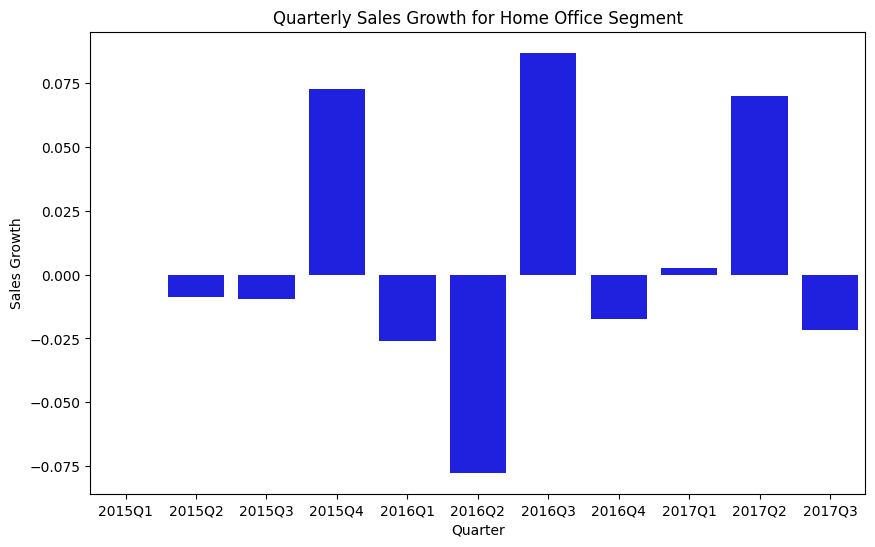

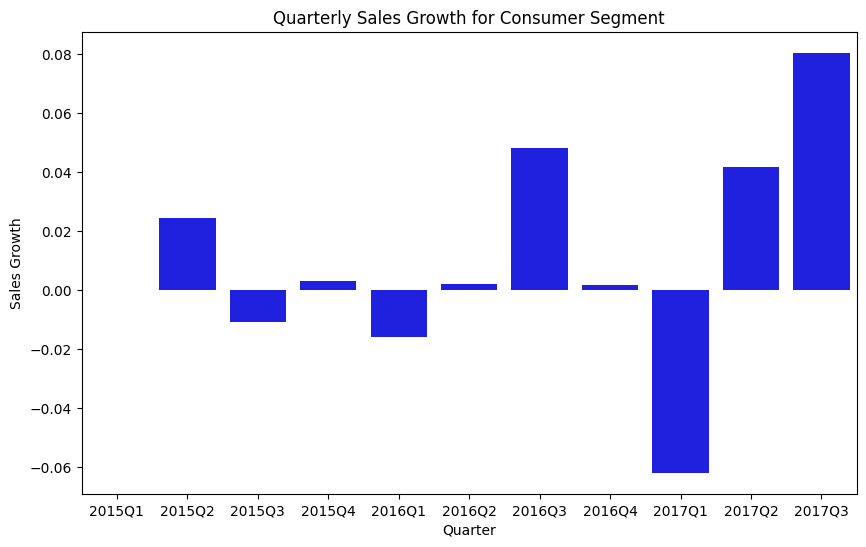

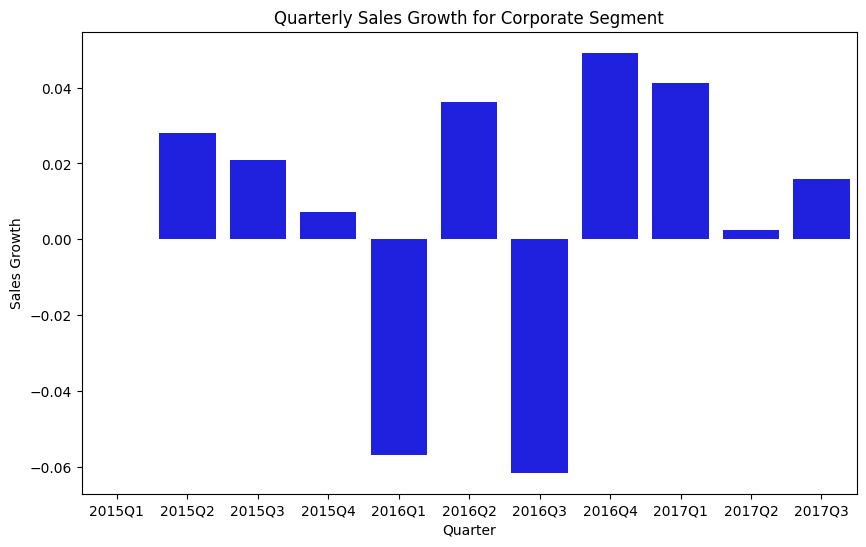

In [158]:

df = df.sort_values(by='OrderDate')


df['Quarter'] = df['OrderDate'].dt.to_period('Q')
quarterly_sales = df.groupby(['Quarter', 'Customer_Segment'])['Sales'].sum().reset_index()


quarterly_sales['Sales_Growth'] = quarterly_sales.groupby('Customer_Segment')['Sales'].pct_change()


customer_segments = ['Home Office', 'Consumer', 'Corporate']

for segment in customer_segments:
    segment_data = quarterly_sales[quarterly_sales['Customer_Segment'] == segment]
    
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Quarter', y='Sales_Growth', data=segment_data, color='blue')
    plt.title(f'Quarterly Sales Growth for {segment} Segment')
    plt.xlabel('Quarter')
    plt.ylabel('Sales Growth')
    plt.show()

/var/folders/fy/fj7y6ph920j5r199851bfn1r0000gn/T/ipykernel_32338/3406721978.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  q2_data = df_consumer[(df_consumer['OrderDate'] >= '2016-04-01') & (df['OrderDate'] < '2016-07-01')]
/var/folders/fy/fj7y6ph920j5r199851bfn1r0000gn/T/ipykernel_32338/3406721978.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  q2_2017_data = df_consumer[(df_consumer['OrderDate'] >= '2017-04-01') & (df['OrderDate'] < '2017-07-01')]
/var/folders/fy/fj7y6ph920j5r199851bfn1r0000gn/T/ipykernel_32338/3406721978.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  q3_data = df_consumer[(df_consumer['OrderDate'] >= '2016-07-01') & (df['OrderDate'] < '2016-10-01')]


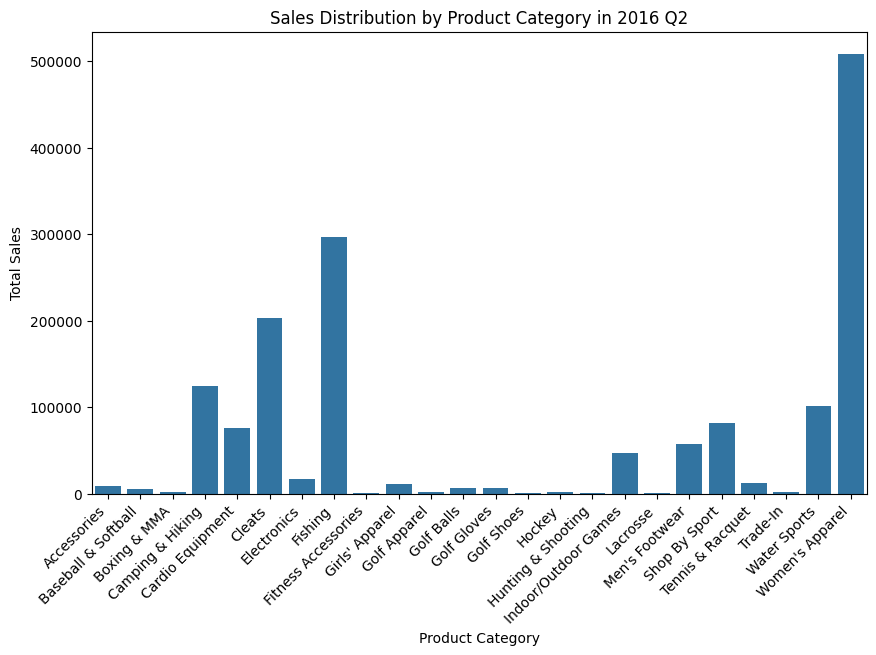

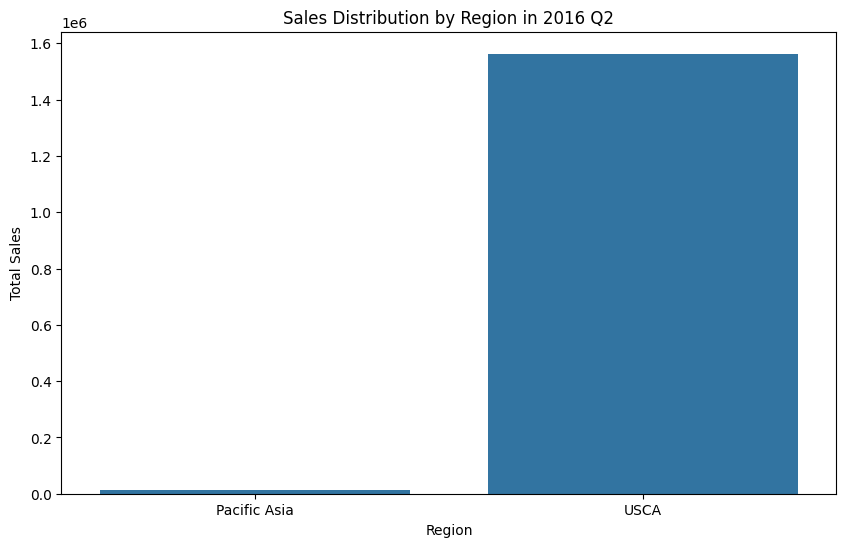

In [159]:
q2_data = df_consumer[(df_consumer['OrderDate'] >= '2016-04-01') & (df['OrderDate'] < '2016-07-01')]
q2_2017_data = df_consumer[(df_consumer['OrderDate'] >= '2017-04-01') & (df['OrderDate'] < '2017-07-01')]
q3_data = df_consumer[(df_consumer['OrderDate'] >= '2016-07-01') & (df['OrderDate'] < '2016-10-01')]

sales_by_product = q2_data.groupby('Category_Name')['Sales'].sum().reset_index()
sales_by_region = q2_data.groupby('Market')['Sales'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='Category_Name', y='Sales', data=sales_by_product)
plt.title('Sales Distribution by Product Category in 2016 Q2')
plt.xlabel('Product Category')
plt.ylabel('Total Sales')
plt.xticks(rotation=45, ha='right') 
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x='Market', y='Sales', data=sales_by_region)
plt.title('Sales Distribution by Region in 2016 Q2')
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.show()

/var/folders/fy/fj7y6ph920j5r199851bfn1r0000gn/T/ipykernel_32338/3803448758.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  segment_data['Quarter'] = segment_data['Quarter'].astype(str)
/var/folders/fy/fj7y6ph920j5r199851bfn1r0000gn/T/ipykernel_32338/3803448758.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  segment_data['Quarter'] = segment_data['Quarter'].astype(str)
/var/folders/fy/fj7y6ph920j5r199851bfn1r0000gn/T/ipykernel_32338/3803448758.py:15: SettingWithCopyWarning: 
A value is trying to b

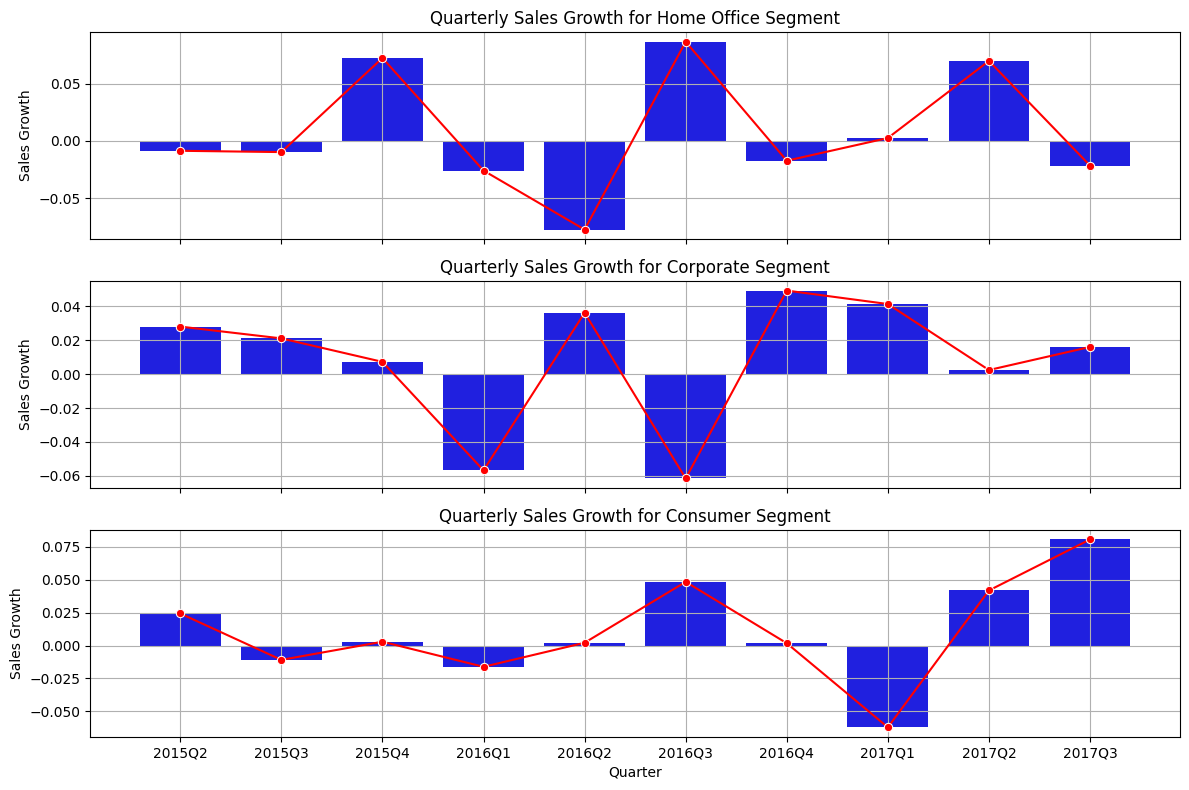

In [160]:

df = df.sort_values(by='OrderDate')

df['Quarter'] = df['OrderDate'].dt.to_period('Q')

quarterly_sales = df.groupby(['Quarter', 'Customer_Segment'])['Sales'].sum().reset_index()

quarterly_sales['Sales_Growth'] = quarterly_sales.groupby('Customer_Segment')['Sales'].pct_change()

customer_segments = ['Home Office', 'Corporate', 'Consumer']

fig, axes = plt.subplots(nrows=len(customer_segments), ncols=1, figsize=(12, 8), sharex=True)

for i, segment in enumerate(customer_segments):
    segment_data = quarterly_sales[quarterly_sales['Customer_Segment'] == segment]
    segment_data['Quarter'] = segment_data['Quarter'].astype(str)
    
    sns.barplot(x='Quarter', y='Sales_Growth', data=segment_data, color='blue', ax=axes[i])
   
    sns.lineplot(x='Quarter', y='Sales_Growth', data=segment_data, color='red', marker='o', ax=axes[i])
   
    axes[i].set_title(f'Quarterly Sales Growth for {segment} Segment')
    axes[i].set_ylabel('Sales Growth')
    axes[i].grid(True)

plt.xlabel('Quarter')
plt.tight_layout()
plt.show()

/var/folders/fy/fj7y6ph920j5r199851bfn1r0000gn/T/ipykernel_32338/3133542418.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  q2_data3 = df_home_office[(df_home_office['OrderDate'] >= '2016-07-01') & (df['OrderDate'] < '2016-10-01')]
/var/folders/fy/fj7y6ph920j5r199851bfn1r0000gn/T/ipykernel_32338/3133542418.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  q2_data2 = df_corporate[(df_corporate['OrderDate'] >= '2016-07-01') & (df['OrderDate'] < '2016-10-01')]


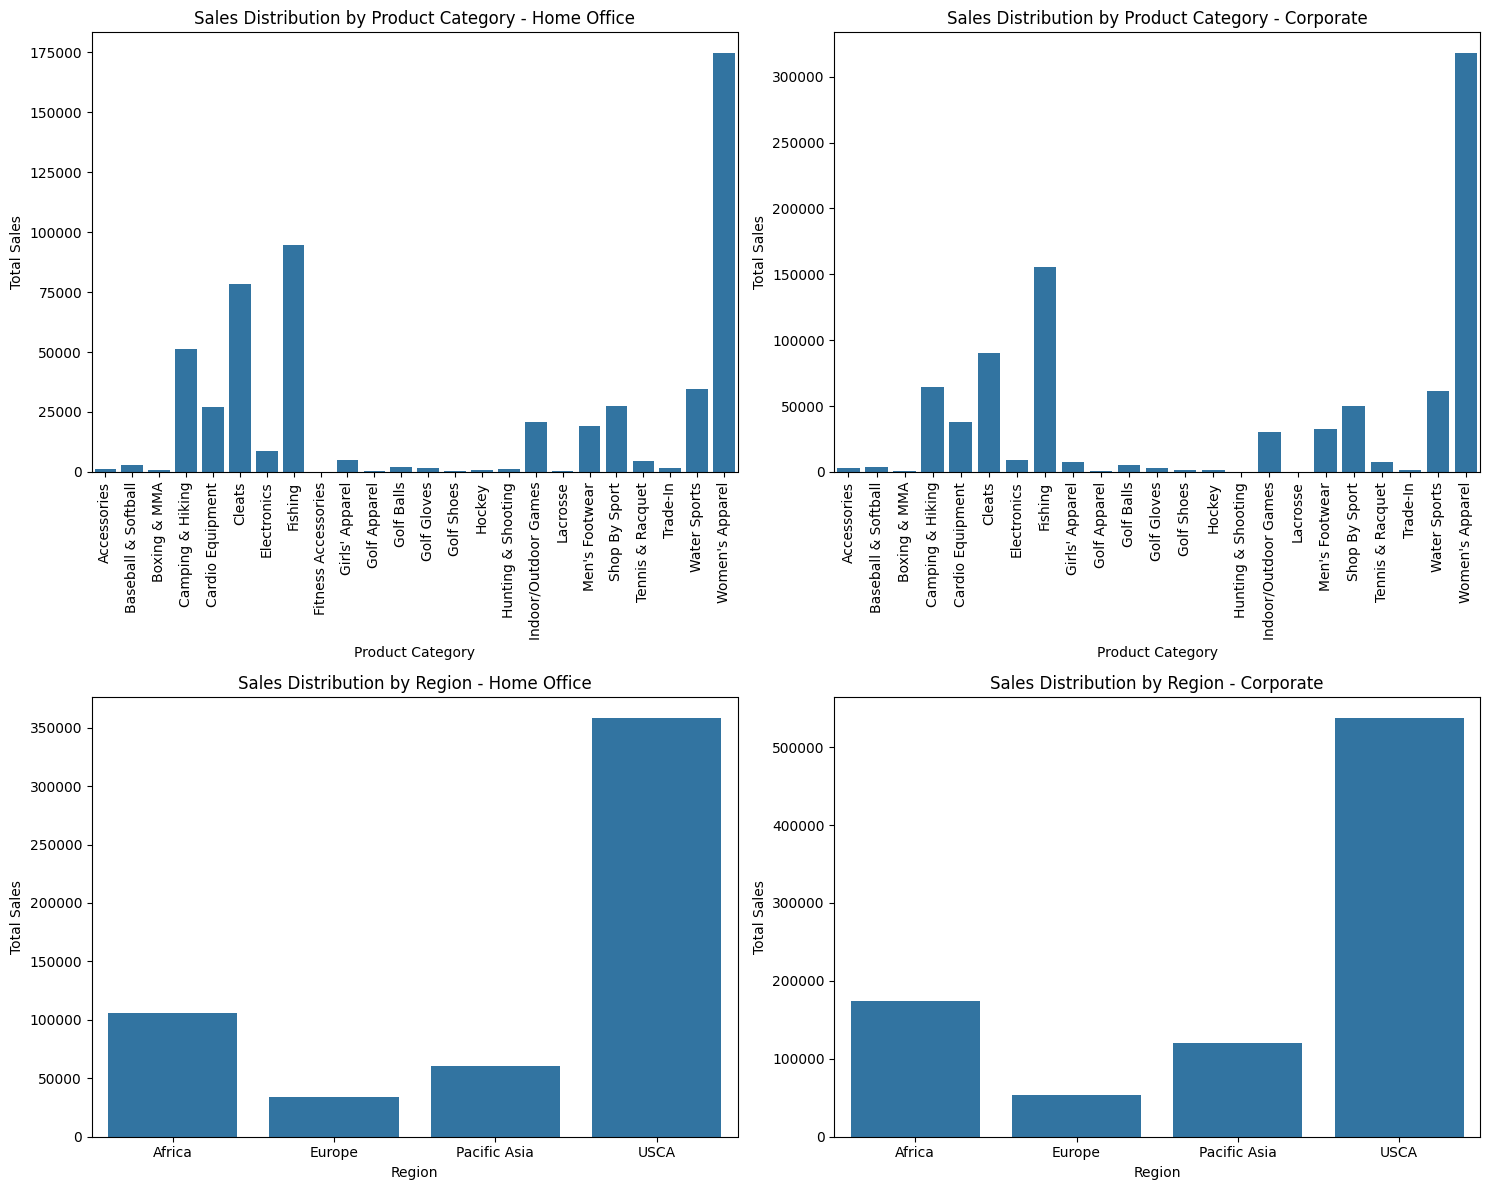

In [161]:
q2_data3 = df_home_office[(df_home_office['OrderDate'] >= '2016-07-01') & (df['OrderDate'] < '2016-10-01')]
q2_data2 = df_corporate[(df_corporate['OrderDate'] >= '2016-07-01') & (df['OrderDate'] < '2016-10-01')]
sales_by_product_segment1 = q2_data3.groupby('Category_Name')['Sales'].sum().reset_index()
sales_by_product_segment2 = q2_data2.groupby('Category_Name')['Sales'].sum().reset_index()

sales_by_region_segment1 = q2_data3.groupby('Market')['Sales'].sum().reset_index()
sales_by_region_segment2 = q2_data2.groupby('Market')['Sales'].sum().reset_index()

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 12))

sns.barplot(x='Category_Name', y='Sales', data=sales_by_product_segment1, ax=axes[0, 0])
axes[0, 0].set_title('Sales Distribution by Product Category - Home Office')
axes[0, 0].set_xlabel('Product Category')
axes[0, 0].set_ylabel('Total Sales')
axes[0, 0].tick_params(axis='x', rotation=90)

sns.barplot(x='Category_Name', y='Sales', data=sales_by_product_segment2, ax=axes[0, 1])
axes[0, 1].set_title('Sales Distribution by Product Category - Corporate')
axes[0, 1].set_xlabel('Product Category')
axes[0, 1].set_ylabel('Total Sales')
axes[0, 1].tick_params(axis='x', rotation=90)

sns.barplot(x='Market', y='Sales', data=sales_by_region_segment1, ax=axes[1, 0])
axes[1, 0].set_title('Sales Distribution by Region - Home Office')
axes[1, 0].set_xlabel('Region')
axes[1, 0].set_ylabel('Total Sales')

sns.barplot(x='Market', y='Sales', data=sales_by_region_segment2, ax=axes[1, 1])
axes[1, 1].set_title('Sales Distribution by Region - Corporate')
axes[1, 1].set_xlabel('Region')
axes[1, 1].set_ylabel('Total Sales')

plt.tight_layout()

plt.show()

In [219]:
df_2 = pd.read_csv("/Users/branly/PA.csv")

df_2.head()


,Product_Name,Category_Name,total_sales,average_sales,number_of_orders
0,adidas Brazuca 2014 Official Match Ball,Baseball & Softball,434419.319201,185.728653,2339
1,adidas Kids' F5 Messi FG Soccer Cleat,Baseball & Softball,434419.319201,185.728653,2339
2,adidas Men's F10 Messi TRX FG Soccer Cleat,Baseball & Softball,434419.319201,185.728653,2339
3,adidas Men's Germany Black Crest Away Tee,Girls' Apparel,777924.153055,176.961818,4396
4,adidas Youth Germany Black/Red Away Match Soc,Girls' Apparel,777924.153055,176.961818,4396


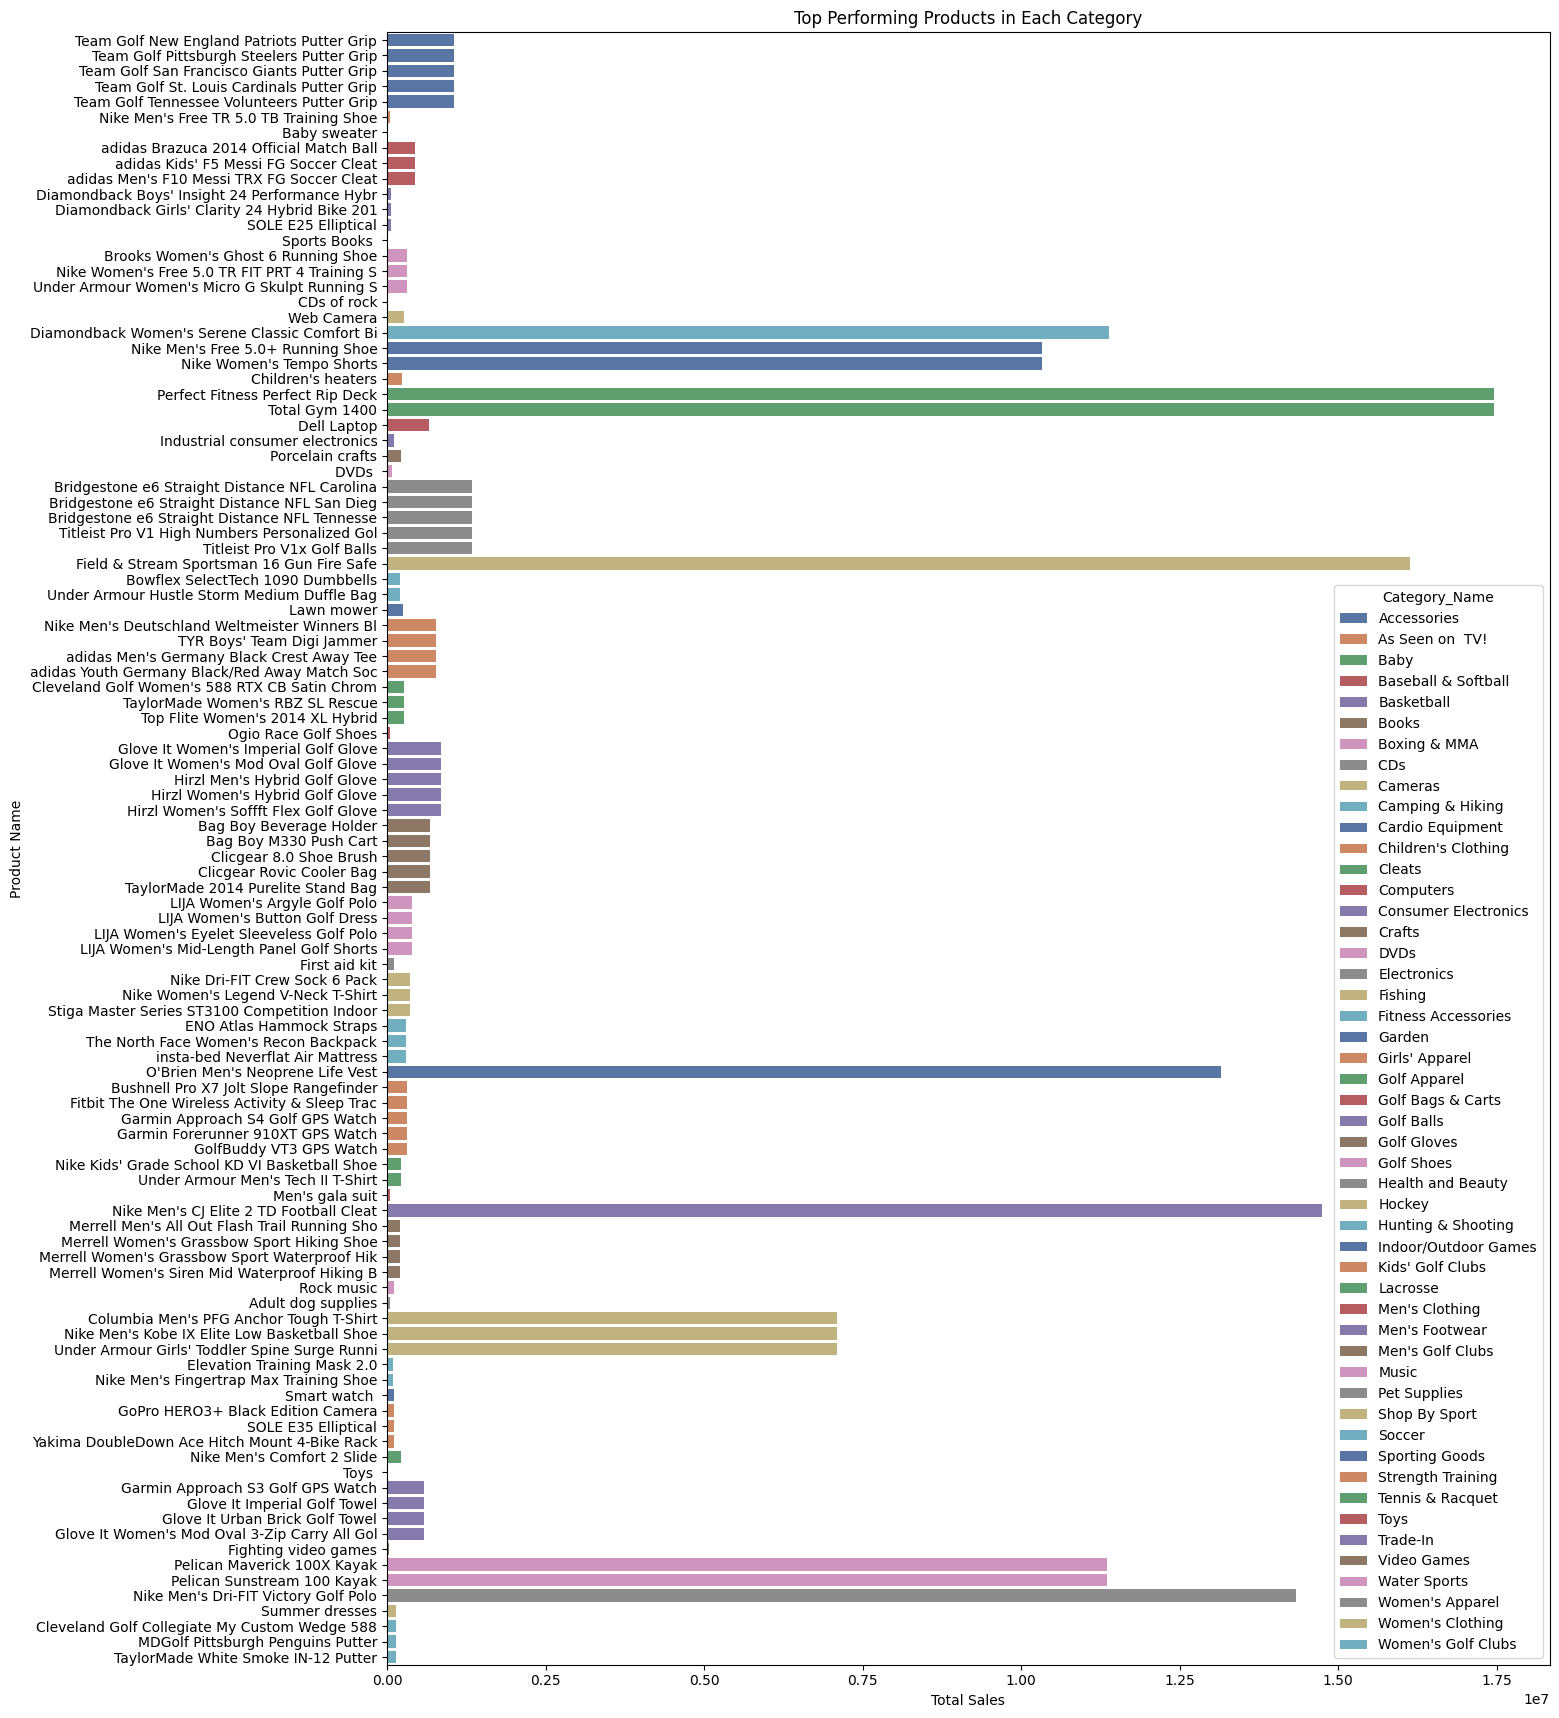

In [249]:
product_performance = df_2.groupby(['Category_Name', 'Product_Name']).agg({'total_sales': 'sum', 'average_sales': 'mean', 'number_of_orders': 'count'}).reset_index()

top_products = product_performance.sort_values(by=['Category_Name', 'total_sales'], ascending=[True, False]).groupby('Category_Name').head(5)

fig, ax = plt.subplots(figsize=(15, len(top_products) * 0.2))
sns.barplot(x='total_sales', y='Product_Name', hue='Category_Name', data=top_products,  ax=ax, palette='deep')
plt.title('Top Performing Products in Each Category')
plt.xlabel('Total Sales')
plt.ylabel('Product Name')
plt.show()


In [260]:
df4 = pd.read_csv("/Users/branly/Desktop/Python Project/MarketTrends.csv")

aggregate_4 = {
    'Market':'last',
    'Product_Name':'last',
    'OrderDate':'last',
    'OrderDate': 'last',
    
}

df_mt= df4.groupby('column1').agg(aggregate_4).reset_index()

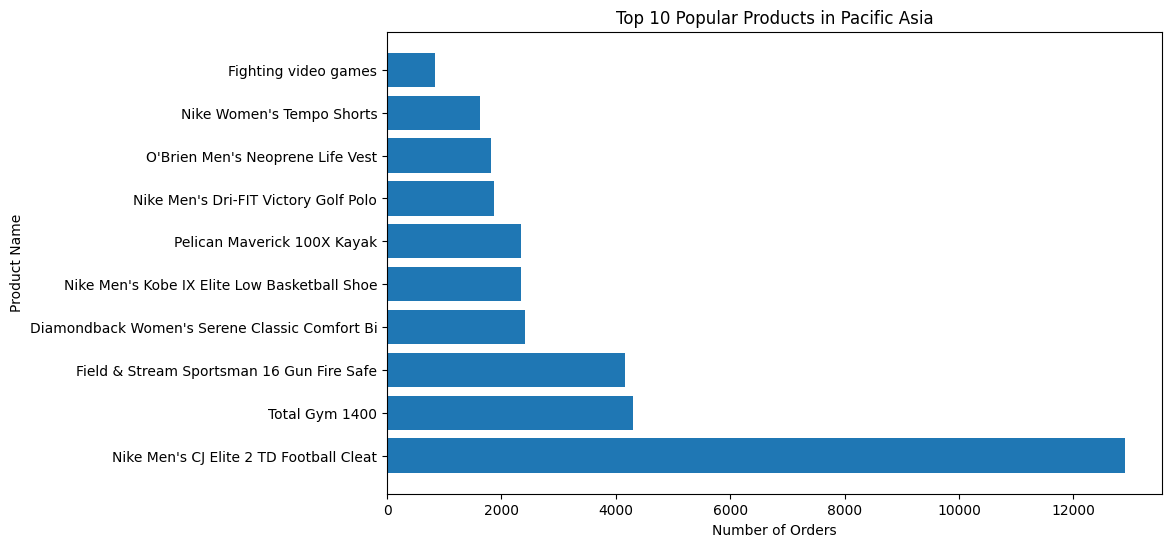

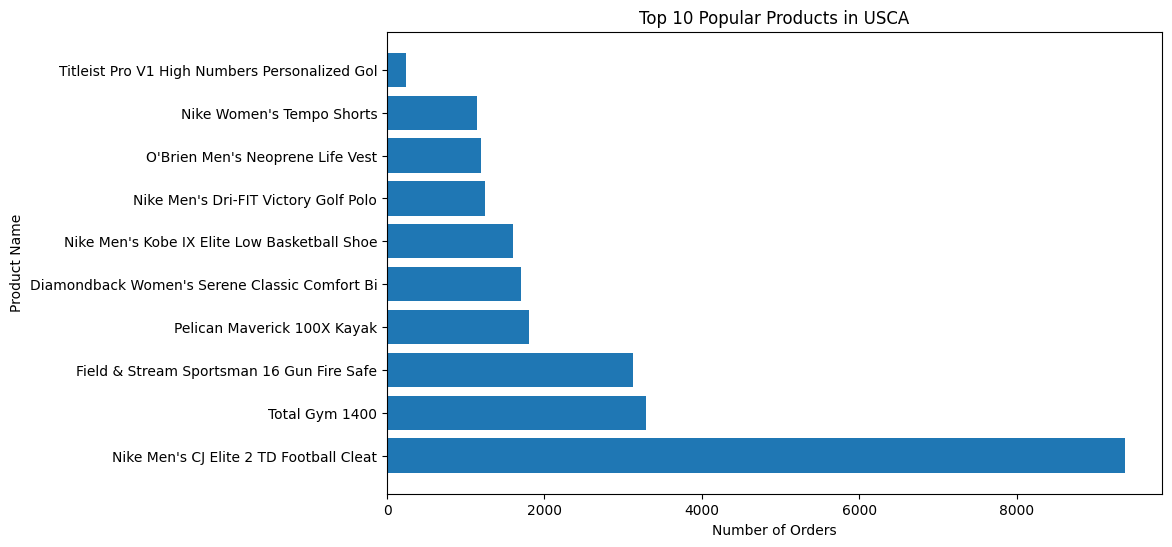

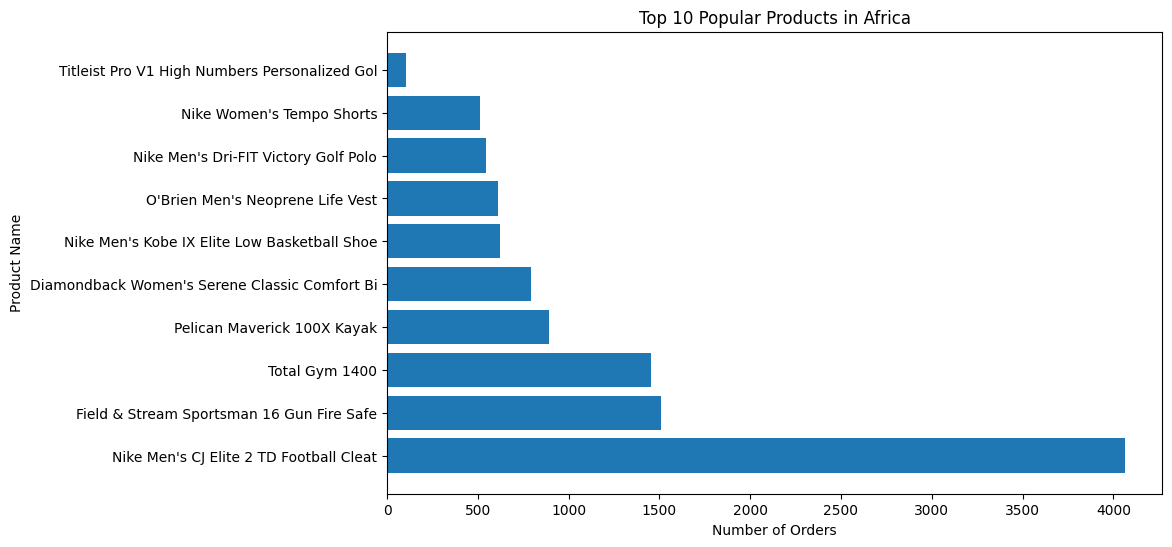

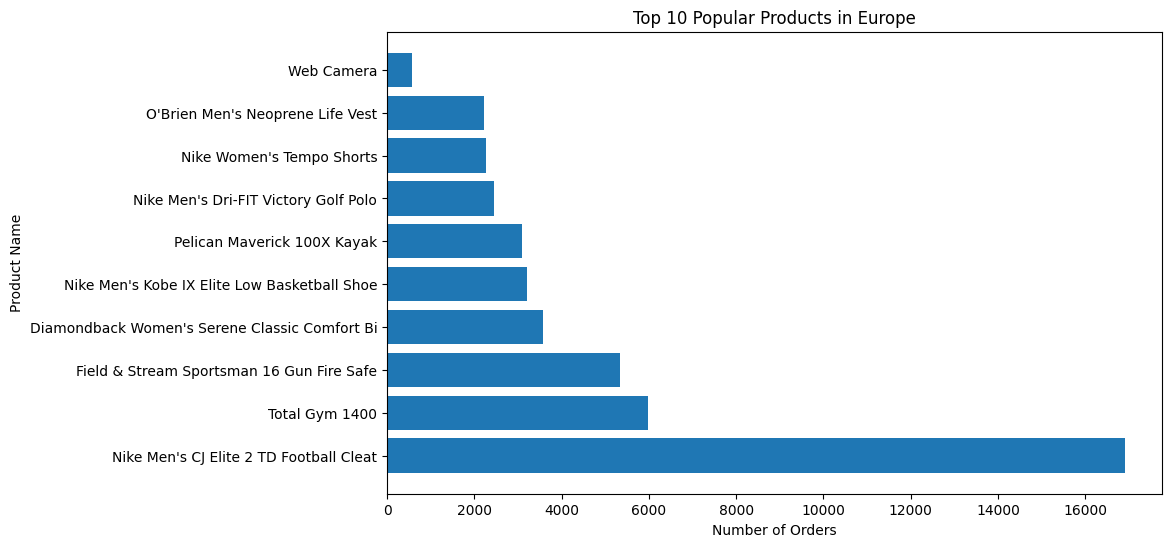

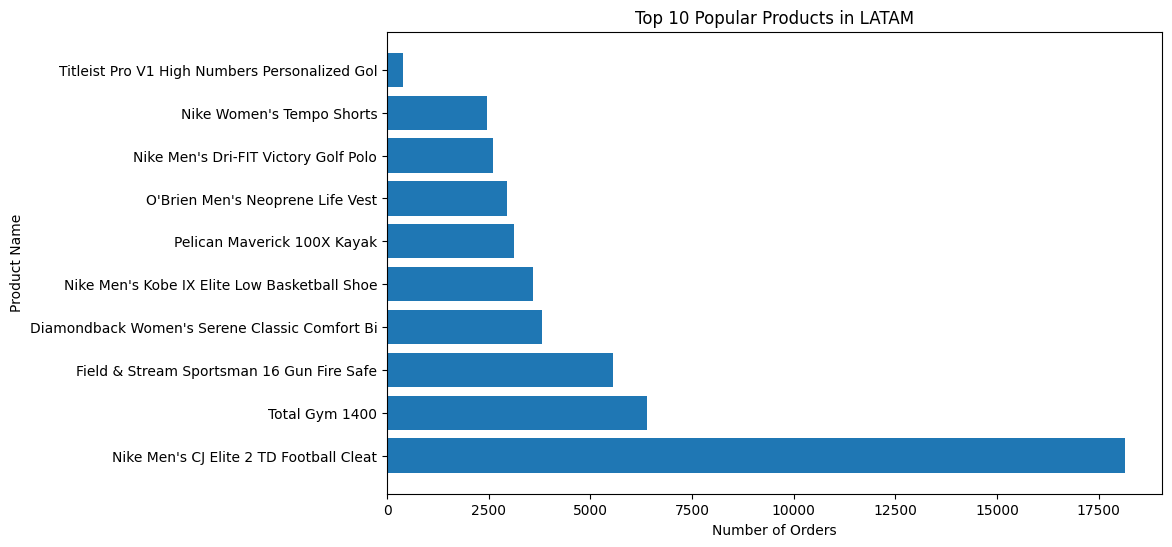

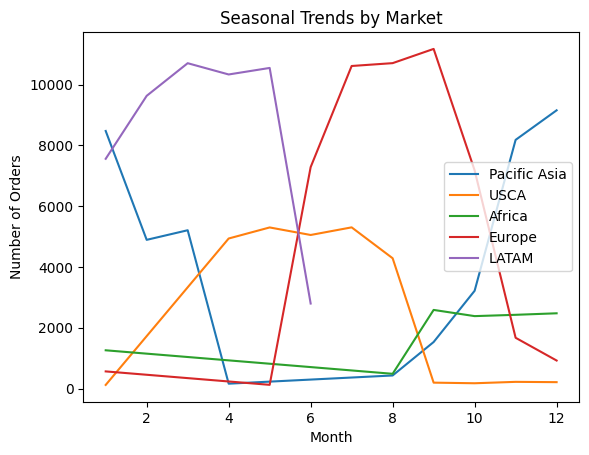

In [268]:
df_mt['OrderDate'] = pd.to_datetime(df_mt['OrderDate'])
popular_products_by_market = df_mt.groupby(['Market', 'Product_Name']).size().sort_values(ascending=False).reset_index(name='count')

for market in df_mt['Market'].unique():
    plt.figure(figsize=(10,6))
    market_data = popular_products_by_market[popular_products_by_market['Market'] == market]
    # Selecting top N products for clarity in visualization
    top_n = market_data.head(10)
    plt.barh(top_n['Product_Name'], top_n['count'])
    plt.xlabel('Number of Orders')
    plt.ylabel('Product Name')
    plt.title(f'Top 10 Popular Products in {market}')
    plt.show()

# Analysis 2: Identify seasonal trends
# Extract month from the order date for seasonal analysis
df_mt['month'] = df_mt['OrderDate'].dt.month

# Group by market and month
seasonal_trends = df_mt.groupby(['Market', 'month']).size().reset_index(name='count')

# Plotting
for market in df_mt['Market'].unique():
    market_data = seasonal_trends[seasonal_trends['Market'] == market]
    plt.plot(market_data['month'], market_data['count'], label=market)

plt.xlabel('Month')
plt.ylabel('Number of Orders')
plt.title('Seasonal Trends by Market')
plt.legend()
plt.show()

In [276]:
df7 = pd.read_csv("/Users/branly/Desktop/Python Project/PPO.csv")

aggregate_5 = {
    'Order_Profit_Per_Order': 'last',
    'Product_Name':'last',
    'Order_Item_Product_Price':'last',
    'OrderDate': 'last',
    
    


}


df_p = df7.groupby('column1').agg(aggregate_5).reset_index()

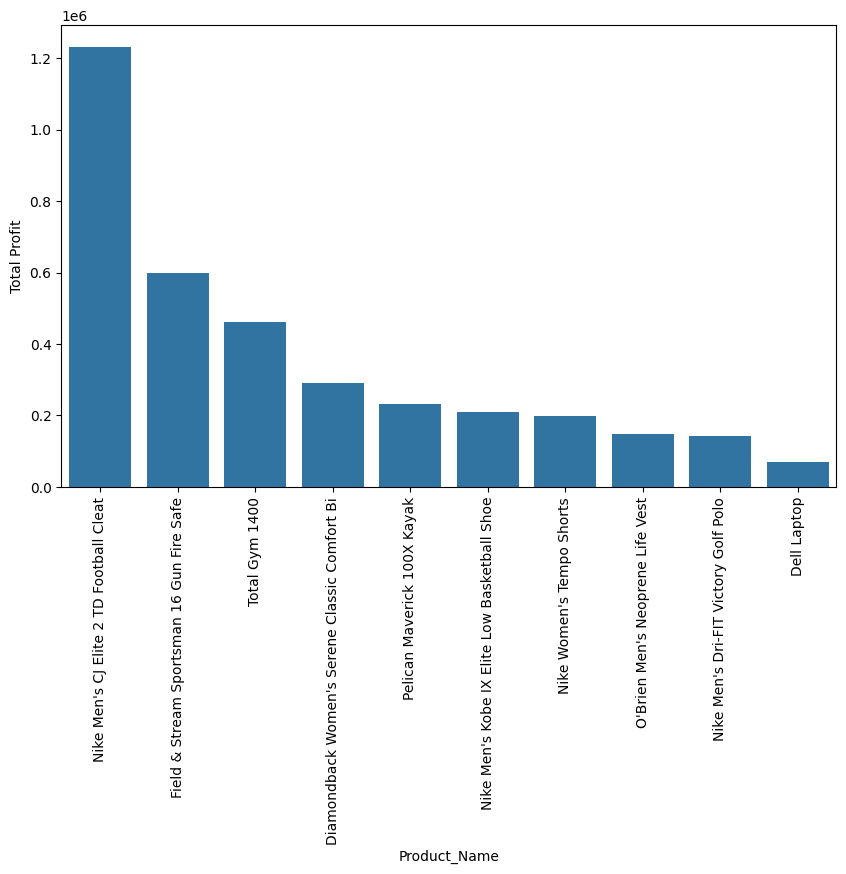

In [280]:
profit_per_product = df_p.groupby('Product_Name')['Order_Profit_Per_Order'].sum()


profit_per_product = profit_per_product.sort_values(ascending=False)


df_p['profit_margin'] = (df_p['Order_Profit_Per_Order'] - df_p['Order_Item_Product_Price']) / df_p['Order_Item_Product_Price']


profit_margin_per_product = df_p.groupby('Product_Name')['profit_margin'].mean()


profit_margin_per_product = profit_margin_per_product.sort_values(ascending=False)

combined_data = pd.DataFrame({
    'Total Profit': profit_per_product,
    'Average Profit Margin': profit_margin_per_product
})


combined_data = combined_data.sort_values(by='Total Profit', ascending=False)

top_n = combined_data.head(10)  

plt.figure(figsize=(10, 6)) 
sns.barplot(x=top_n.index, y='Total Profit', data=top_n)
plt.xticks(rotation=90)  
plt.show()




In [289]:
df8 = pd.read_csv("/Users/branly/Desktop/Python Project/OrderSS.csv")

aggregate_6 = {
    'Order_Profit_Per_Order': 'last',
    'Product_Name':'last',
    'Order_Item_Product_Price':'last',
    'OrderDate': 'last',
    'Order_Status':'last',
    'Order_Country':'last',
    'Late_delivery_risk':'last',
    'Category_Name':'last'
    
    


}


df_os = df8.groupby('column1').agg(aggregate_6).reset_index()

df_os.head()

,column1,Order_Profit_Per_Order,Product_Name,Order_Item_Product_Price,OrderDate,Order_Status,Order_Country,Late_delivery_risk,Category_Name
0,0,91.250000,Smart watch,327.75,2018-01-31 22:56:00.0000000,COMPLETE,Indonesia,0,Sporting Goods
1,1,-249.089996,Smart watch,327.75,2018-01-13 12:27:00.0000000,PENDING,India,1,Sporting Goods
2,2,-247.779999,Smart watch,327.75,2018-01-13 12:06:00.0000000,CLOSED,India,0,Sporting Goods
3,3,22.860001,Smart watch,327.75,2018-01-13 11:45:00.0000000,COMPLETE,Australia,0,Sporting Goods
4,4,134.210007,Smart watch,327.75,2018-01-13 11:24:00.0000000,PENDING_PAYMENT,Australia,0,Sporting Goods


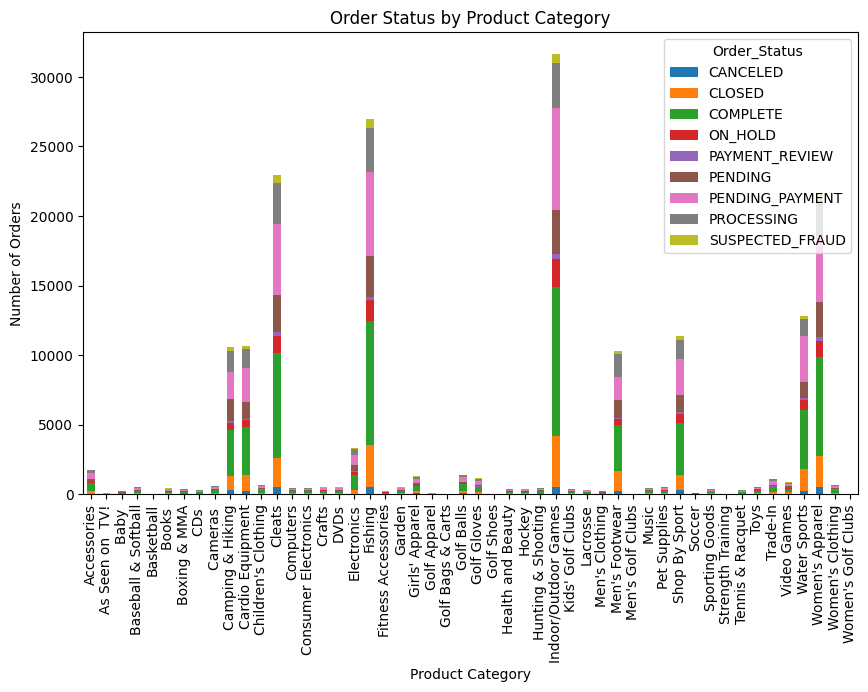

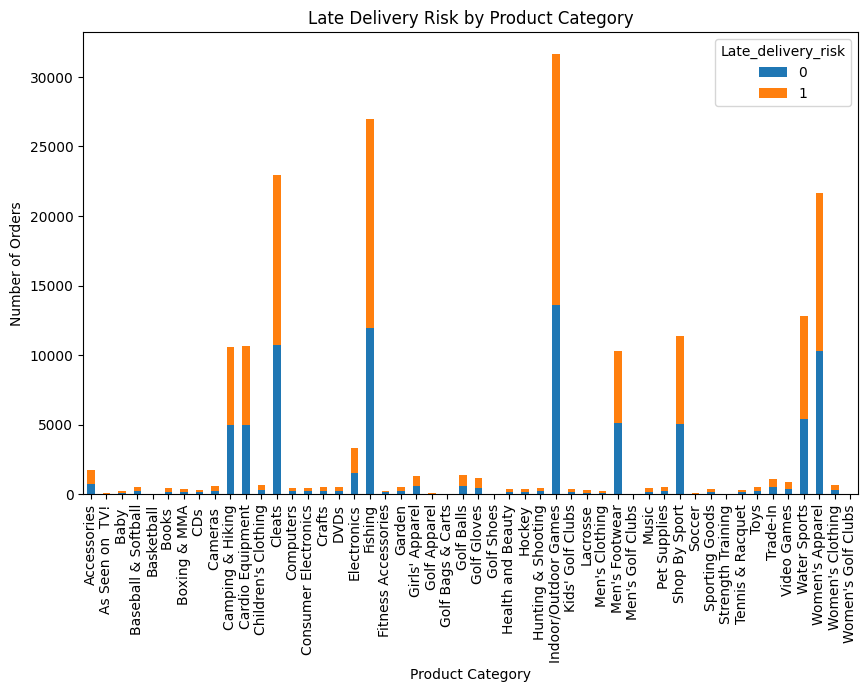

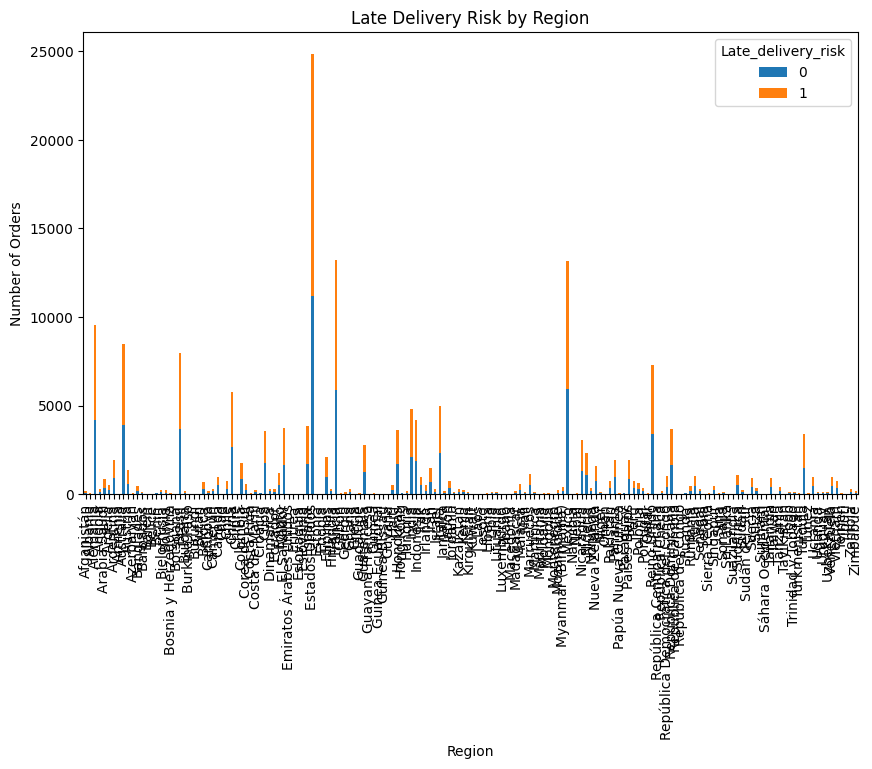

In [294]:
status_counts = df_os.groupby(['Category_Name', 'Order_Status'])['Order_Status'].count().unstack()
status_counts.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Order Status by Product Category')
plt.ylabel('Number of Orders')
plt.xlabel('Product Category')
plt.show()

late_delivery = df_os.groupby(['Category_Name', 'Late_delivery_risk'])['Late_delivery_risk'].count().unstack()
late_delivery.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Late Delivery Risk by Product Category')
plt.ylabel('Number of Orders')
plt.xlabel('Product Category')
plt.show()

region_late_delivery = df_os.groupby(['Order_Country', 'Late_delivery_risk'])['Late_delivery_risk'].count().unstack()
region_late_delivery.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Late Delivery Risk by Region')
plt.ylabel('Number of Orders')
plt.xlabel('Region')
plt.show()
